Files required:

O*Net datasets

- Occupation Data.txt
- Job Zones.txt
- Education, Training, and Experience.txt
- Interests.txt
- Work Values.txt
- Work Styles.txt
- Work Activities.txt
- Knowledge.txt
- Work Context.txt
- Task Statements.txt

In [1]:
# Files
occupation_data_file = "https://www.onetcenter.org/dl_files/database/db_27_2_text/Occupation%20Data.txt"
job_zones_file = "https://www.onetcenter.org/dl_files/database/db_27_2_text/Job%20Zones.txt"
edu_file = "https://www.onetcenter.org/dl_files/database/db_27_2_text/Education%2C%20Training%2C%20and%20Experience.txt"
interests_file = "https://www.onetcenter.org/dl_files/database/db_27_2_text/Interests.txt"
work_values_file = "https://www.onetcenter.org/dl_files/database/db_27_2_text/Work%20Values.txt"
work_styles_file = "https://www.onetcenter.org/dl_files/database/db_27_2_text/Work%20Styles.txt"
work_activities_file = "https://www.onetcenter.org/dl_files/database/db_27_2_text/Work%20Activities.txt"
knowledge_file = "https://www.onetcenter.org/dl_files/database/db_27_2_text/Knowledge.txt"
work_context_file = "https://www.onetcenter.org/dl_files/database/db_27_2_text/Work%20Context.txt"
task_statements_file = "https://www.onetcenter.org/dl_files/database/db_27_2_text/Task%20Statements.txt"
career_pathways_file = "https://www.onetonline.org/find/career/All_Career_Clusters.csv?c=0&fmt=csv"

In [2]:
!pip install pandas matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# For debugging
!pip install -Uqq ipdb
import ipdb

# To pause on exception:
# %pdb on

# For breakpoints:
# ipdb.set_trace(context=6)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
import pprint

In [5]:
# Loading the Occupational dataset
occupation_data = pd.read_csv(occupation_data_file, sep='\t')

index_col = "O*NET-SOC Code"

occupation_data = occupation_data.set_index(index_col)

occupation_data.head()

,Title,Description
O*NET-SOC Code,,
11-1011.00,Chief Executives,Determine and formulate policies and provide o...
11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh..."
11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ..."
11-1031.00,Legislators,"Develop, introduce, or enact laws and statutes..."
11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici..."


In [6]:
job_zones_data = pd.read_csv(job_zones_file, sep='\t').set_index(index_col)

job_zones_data.head()

,Job Zone,Date,Domain Source
O*NET-SOC Code,,,
11-1011.00,5,07/2014,Analyst
11-1011.03,5,08/2021,Analyst
11-1021.00,4,07/2015,Analyst
11-1031.00,4,06/2008,Analyst
11-2011.00,4,08/2018,Analyst


In [7]:
occupation_zone_data = occupation_data.merge(
  job_zones_data, on=index_col, suffixes=("_df1", "_df2"), how="left"
)

occupation_zone_data.head()

,Title,Description,Job Zone,Date,Domain Source
O*NET-SOC Code,,,,,
11-1011.00,Chief Executives,Determine and formulate policies and provide o...,5.0,07/2014,Analyst
11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",5.0,08/2021,Analyst
11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",4.0,07/2015,Analyst
11-1031.00,Legislators,"Develop, introduce, or enact laws and statutes...",4.0,06/2008,Analyst
11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",4.0,08/2018,Analyst


In [8]:
edu_data = pd.read_csv(edu_file, sep='\t')

edu_data.head()

,O*NET-SOC Code,Element ID,Element Name,Scale ID,Category,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Date,Domain Source
0,11-1011.00,2.D.1,Required Level of Education,RL,1.0,0.00,27,0.00,NaN,NaN,N,07/2014,Incumbent
1,11-1011.00,2.D.1,Required Level of Education,RL,2.0,0.00,27,0.00,NaN,NaN,N,07/2014,Incumbent
2,11-1011.00,2.D.1,Required Level of Education,RL,3.0,0.00,27,0.00,NaN,NaN,N,07/2014,Incumbent
3,11-1011.00,2.D.1,Required Level of Education,RL,4.0,6.05,27,4.43,1.28,24.19,N,07/2014,Incumbent
4,11-1011.00,2.D.1,Required Level of Education,RL,5.0,4.23,27,4.27,0.50,27.80,N,07/2014,Incumbent


In [9]:
def snake_case(x):
  string = re.sub("[ -/,;&!@#$%^]+", "_", x.lower())
  return string

def concat_category(x):
  return f'_{x:.0f}' if not pd.isnull(x) else ''

In [10]:
edu_data["element_category"] = edu_data["Element Name"].apply(snake_case)\
   + edu_data["Category"].apply(concat_category)

edu_data["element_category"]

0        required_level_of_education_1
1        required_level_of_education_2
2        required_level_of_education_3
3        required_level_of_education_4
4        required_level_of_education_5
                     ...              
35718            on_the_job_training_5
35719            on_the_job_training_6
35720            on_the_job_training_7
35721            on_the_job_training_8
35722            on_the_job_training_9
Name: element_category, Length: 35723, dtype: object

In [11]:
# Get all element names
element_names = list(edu_data["element_category"].unique())

# Rearrange 'certification' position
item_to_move = 'job_related_professional_certification'
element_names.remove(item_to_move)
element_names.insert(12, item_to_move)
element_names

['required_level_of_education_1',
 'required_level_of_education_2',
 'required_level_of_education_3',
 'required_level_of_education_4',
 'required_level_of_education_5',
 'required_level_of_education_6',
 'required_level_of_education_7',
 'required_level_of_education_8',
 'required_level_of_education_9',
 'required_level_of_education_10',
 'required_level_of_education_11',
 'required_level_of_education_12',
 'job_related_professional_certification',
 'related_work_experience_1',
 'related_work_experience_2',
 'related_work_experience_3',
 'related_work_experience_4',
 'related_work_experience_5',
 'related_work_experience_6',
 'related_work_experience_7',
 'related_work_experience_8',
 'related_work_experience_9',
 'related_work_experience_10',
 'related_work_experience_11',
 'on_site_or_in_plant_training_1',
 'on_site_or_in_plant_training_2',
 'on_site_or_in_plant_training_3',
 'on_site_or_in_plant_training_4',
 'on_site_or_in_plant_training_5',
 'on_site_or_in_plant_training_6',
 'on

In [12]:
# Split the Occupational Expert, apprenticeship, and job_related_professional_certification data from the other education data
edu_exclude_cols = ["job_related_professional_certification", "apprenticeship"]
edu_col_names = list(filter(lambda x: x not in edu_exclude_cols, element_names))

# 1. Jobs with certifications and apprenticeships
edu_excl_df = edu_data[["O*NET-SOC Code", 'element_category', 'Data Value']].loc[edu_data['element_category'].isin(edu_exclude_cols)]
edu_excl_df_group = edu_excl_df.groupby(["O*NET-SOC Code"])\
  .agg(lambda x: list(x)).reset_index()
edu_excl_df_group[edu_exclude_cols] = pd.DataFrame(edu_excl_df_group['Data Value'].tolist(), index=edu_excl_df_group.index)
edu_excl_df_group.head()

,O*NET-SOC Code,element_category,Data Value,job_related_professional_certification,apprenticeship
0,11-1011.03,"[job_related_professional_certification, appre...","[2.7, 1.81]",2.70,1.81
1,11-2011.00,"[job_related_professional_certification, appre...","[1.98, 2.11]",1.98,2.11
2,11-3031.00,"[job_related_professional_certification, appre...","[3.2, 1.45]",3.20,1.45
3,11-3031.01,"[job_related_professional_certification, appre...","[3.52, 1.71]",3.52,1.71
4,11-3051.00,"[job_related_professional_certification, appre...","[1.66, 2.21]",1.66,2.21


In [13]:
# 2. Jobs rated by incumbents
edu_data_group = edu_data[["O*NET-SOC Code", 'element_category', 'Data Value']].loc[list(set(edu_data.index) - set(edu_excl_df.index))]\
  .groupby(["O*NET-SOC Code"])\
  .agg(lambda x: list(x)).reset_index()
edu_data_group[edu_col_names] = pd.DataFrame(edu_data_group['Data Value'].tolist(), index=edu_data_group.index)

edu_data_group.head()

,O*NET-SOC Code,element_category,Data Value,required_level_of_education_1,required_level_of_education_2,required_level_of_education_3,required_level_of_education_4,required_level_of_education_5,required_level_of_education_6,required_level_of_education_7,...,on_site_or_in_plant_training_9,on_the_job_training_1,on_the_job_training_2,on_the_job_training_3,on_the_job_training_4,on_the_job_training_5,on_the_job_training_6,on_the_job_training_7,on_the_job_training_8,on_the_job_training_9
0,11-1011.00,"[required_level_of_education_1, required_level...","[0.0, 0.0, 0.0, 6.05, 4.23, 21.61, 13.66, 25.8...",0.00,0.00,0.0,6.05,4.23,21.61,13.66,...,9.61,36.53,9.55,12.50,2.89,14.38,12.08,7.83,4.23,0.00
1,11-1011.03,"[required_level_of_education_1, required_level...","[0.0, 0.0, 0.0, 0.0, 0.0, 18.52, 0.0, 74.07, 7...",0.00,0.00,0.0,0.00,0.00,18.52,0.00,...,7.41,25.93,18.52,11.11,22.22,7.41,7.41,0.00,3.70,3.70
2,11-1021.00,"[required_level_of_education_1, required_level...","[0.0, 15.2, 9.0, 19.18, 8.59, 29.29, 14.58, 0....",0.00,15.20,9.0,19.18,8.59,29.29,14.58,...,0.31,3.68,24.78,8.56,18.25,30.95,6.28,2.68,4.50,0.31
3,11-2011.00,"[required_level_of_education_1, required_level...","[6.16, 9.82, 0.0, 7.67, 8.04, 60.02, 2.42, 5.8...",6.16,9.82,0.0,7.67,8.04,60.02,2.42,...,4.90,10.58,38.54,21.64,7.65,11.03,5.66,0.00,4.90,0.00
4,11-2021.00,"[required_level_of_education_1, required_level...","[0.0, 3.53, 0.0, 2.8, 3.03, 55.76, 0.0, 24.36,...",0.00,3.53,0.0,2.80,3.03,55.76,0.00,...,0.00,2.40,8.91,52.82,15.63,9.71,0.00,10.53,0.00,0.00


In [14]:
# Merge with Occupations
onet_edu_cols = ["O*NET-SOC Code"] + edu_col_names
onet_ex_cols = ["O*NET-SOC Code"] + edu_exclude_cols

occupation_zone_edu_data = occupation_zone_data.merge(
  edu_data_group[onet_edu_cols], on="O*NET-SOC Code", suffixes=("_df1", "_df2"), how='left'
)
occupation_zone_edu_data.head()

occupation_zone_edu_data_2 = occupation_zone_edu_data.merge(
  edu_excl_df_group[onet_ex_cols], on="O*NET-SOC Code", suffixes=("_df1", "_df2"), how='left'
)

occupation_zone_edu_data_2.head()

,O*NET-SOC Code,Title,Description,Job Zone,Date,Domain Source,required_level_of_education_1,required_level_of_education_2,required_level_of_education_3,required_level_of_education_4,...,on_the_job_training_2,on_the_job_training_3,on_the_job_training_4,on_the_job_training_5,on_the_job_training_6,on_the_job_training_7,on_the_job_training_8,on_the_job_training_9,job_related_professional_certification,apprenticeship
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,5.0,07/2014,Analyst,0.00,0.00,0.0,6.05,...,9.55,12.50,2.89,14.38,12.08,7.83,4.23,0.00,NaN,NaN
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",5.0,08/2021,Analyst,0.00,0.00,0.0,0.00,...,18.52,11.11,22.22,7.41,7.41,0.00,3.70,3.70,2.70,1.81
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",4.0,07/2015,Analyst,0.00,15.20,9.0,19.18,...,24.78,8.56,18.25,30.95,6.28,2.68,4.50,0.31,NaN,NaN
3,11-1031.00,Legislators,"Develop, introduce, or enact laws and statutes...",4.0,06/2008,Analyst,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",4.0,08/2018,Analyst,6.16,9.82,0.0,7.67,...,38.54,21.64,7.65,11.03,5.66,0.00,4.90,0.00,1.98,2.11


In [15]:
# Generic transformation of Data Values to separate columns corresponding to each value

def get_data_values_to_cols(df_source, name):
  df = df_source.copy()
  df[name] = '{}_'.format(name) + df["Element Name"].apply(snake_case)

  # Columns
  # Get all element names
  cols = list(df[name].unique())
  print("Columns: ", cols)

  group_df = df[["O*NET-SOC Code", name, 'Data Value']]\
    .groupby(["O*NET-SOC Code"])\
    .agg(lambda x: list(x)).reset_index()
  group_df[cols] = pd.DataFrame(group_df['Data Value'].tolist(), index=group_df.index)

  return group_df, cols

In [16]:
# Interets
interests_data = pd.read_csv(interests_file, sep='\t')

interests_data = interests_data.loc[(interests_data['Scale ID'] == "OI")]

interests_group, interests_cols = get_data_values_to_cols(interests_data, 'interest')
interests_group.head()

Columns:  ['interest_realistic', 'interest_investigative', 'interest_artistic', 'interest_social', 'interest_enterprising', 'interest_conventional']


,O*NET-SOC Code,interest,Data Value,interest_realistic,interest_investigative,interest_artistic,interest_social,interest_enterprising,interest_conventional
0,11-1011.00,"[interest_realistic, interest_investigative, i...","[1.33, 2.0, 2.67, 3.67, 7.0, 5.33]",1.33,2.00,2.67,3.67,7.0,5.33
1,11-1011.03,"[interest_realistic, interest_investigative, i...","[1.0, 4.33, 2.67, 2.33, 7.0, 4.33]",1.00,4.33,2.67,2.33,7.0,4.33
2,11-1021.00,"[interest_realistic, interest_investigative, i...","[1.33, 1.33, 1.0, 3.33, 7.0, 3.67]",1.33,1.33,1.00,3.33,7.0,3.67
3,11-1031.00,"[interest_realistic, interest_investigative, i...","[1.0, 3.67, 3.67, 4.67, 7.0, 3.0]",1.00,3.67,3.67,4.67,7.0,3.00
4,11-2011.00,"[interest_realistic, interest_investigative, i...","[1.67, 2.0, 5.33, 2.33, 7.0, 4.67]",1.67,2.00,5.33,2.33,7.0,4.67


In [17]:
# Work Styles
styles_data = pd.read_csv(work_styles_file, sep='\t')

style_group, style_cols = get_data_values_to_cols(styles_data, 'style')
style_group.head()

Columns:  ['style_achievement_effort', 'style_persistence', 'style_initiative', 'style_leadership', 'style_cooperation', 'style_concern_for_others', 'style_social_orientation', 'style_self_control', 'style_stress_tolerance', 'style_adaptability_flexibility', 'style_dependability', 'style_attention_to_detail', 'style_integrity', 'style_independence', 'style_innovation', 'style_analytical_thinking']


,O*NET-SOC Code,style,Data Value,style_achievement_effort,style_persistence,style_initiative,style_leadership,style_cooperation,style_concern_for_others,style_social_orientation,style_self_control,style_stress_tolerance,style_adaptability_flexibility,style_dependability,style_attention_to_detail,style_integrity,style_independence,style_innovation,style_analytical_thinking
0,11-1011.00,"[style_achievement_effort, style_persistence, ...","[4.55, 4.43, 4.75, 4.97, 4.44, 4.22, 3.67, 4.5...",4.55,4.43,4.75,4.97,4.44,4.22,3.67,4.52,4.75,4.20,4.65,4.49,4.80,4.54,4.27,4.45
1,11-1011.03,"[style_achievement_effort, style_persistence, ...","[4.19, 4.63, 4.74, 4.81, 4.67, 4.0, 3.78, 4.15...",4.19,4.63,4.74,4.81,4.67,4.00,3.78,4.15,3.96,4.48,4.19,3.89,4.56,4.26,4.48,4.52
2,11-1021.00,"[style_achievement_effort, style_persistence, ...","[4.18, 4.04, 4.35, 4.59, 4.16, 4.06, 3.57, 4.3...",4.18,4.04,4.35,4.59,4.16,4.06,3.57,4.31,4.33,4.09,4.54,4.25,4.30,3.99,3.65,4.03
3,11-2011.00,"[style_achievement_effort, style_persistence, ...","[4.1, 4.32, 4.56, 4.03, 4.51, 3.81, 3.7, 4.18,...",4.10,4.32,4.56,4.03,4.51,3.81,3.70,4.18,4.35,4.42,4.51,4.48,4.17,4.04,3.99,3.88
4,11-2021.00,"[style_achievement_effort, style_persistence, ...","[4.32, 4.23, 4.53, 4.37, 4.08, 3.37, 3.8, 3.87...",4.32,4.23,4.53,4.37,4.08,3.37,3.80,3.87,4.01,4.31,4.35,4.32,4.17,3.88,4.15,4.00


In [18]:
# Work Values
values_data = pd.read_csv(work_values_file, sep='\t')

values_data = values_data.loc[(values_data['Scale ID'] == "EX")]

value_group, value_cols = get_data_values_to_cols(values_data, 'value')
value_group.head()

Columns:  ['value_achievement', 'value_working_conditions', 'value_recognition', 'value_relationships', 'value_support', 'value_independence']


,O*NET-SOC Code,value,Data Value,value_achievement,value_working_conditions,value_recognition,value_relationships,value_support,value_independence
0,11-1011.00,"[value_achievement, value_working_conditions, ...","[6.33, 6.33, 7.0, 5.0, 5.33, 7.0]",6.33,6.33,7.00,5.00,5.33,7.00
1,11-1011.03,"[value_achievement, value_working_conditions, ...","[6.67, 6.33, 6.0, 5.0, 3.33, 6.67]",6.67,6.33,6.00,5.00,3.33,6.67
2,11-1021.00,"[value_achievement, value_working_conditions, ...","[5.33, 6.0, 5.67, 6.33, 4.67, 6.0]",5.33,6.00,5.67,6.33,4.67,6.00
3,11-1031.00,"[value_achievement, value_working_conditions, ...","[5.33, 4.33, 5.0, 5.67, 4.0, 5.0]",5.33,4.33,5.00,5.67,4.00,5.00
4,11-2011.00,"[value_achievement, value_working_conditions, ...","[5.33, 5.33, 5.33, 5.0, 4.0, 5.33]",5.33,5.33,5.33,5.00,4.00,5.33


In [19]:
# Work Activities
activities_data = pd.read_csv(work_activities_file, sep='\t')

activities_data = activities_data.loc[(activities_data['Scale ID'] == "IM")]

activity_group, activity_cols = get_data_values_to_cols(activities_data, 'activity')
activity_group.head()

Columns:  ['activity_getting_information', 'activity_monitoring_processes_materials_or_surroundings', 'activity_identifying_objects_actions_and_events', 'activity_inspecting_equipment_structures_or_materials', 'activity_estimating_the_quantifiable_characteristics_of_products_events_or_information', 'activity_judging_the_qualities_of_objects_services_or_people', 'activity_processing_information', 'activity_evaluating_information_to_determine_compliance_with_standards', 'activity_analyzing_data_or_information', 'activity_making_decisions_and_solving_problems', 'activity_thinking_creatively', 'activity_updating_and_using_relevant_knowledge', 'activity_developing_objectives_and_strategies', 'activity_scheduling_work_and_activities', 'activity_organizing_planning_and_prioritizing_work', 'activity_performing_general_physical_activities', 'activity_handling_and_moving_objects', 'activity_controlling_machines_and_processes', 'activity_operating_vehicles_mechanized_devices_or_equipment', 'activ

,O*NET-SOC Code,activity,Data Value,activity_getting_information,activity_monitoring_processes_materials_or_surroundings,activity_identifying_objects_actions_and_events,activity_inspecting_equipment_structures_or_materials,activity_estimating_the_quantifiable_characteristics_of_products_events_or_information,activity_judging_the_qualities_of_objects_services_or_people,activity_processing_information,...,activity_performing_for_or_working_directly_with_the_public,activity_coordinating_the_work_and_activities_of_others,activity_developing_and_building_teams,activity_training_and_teaching_others,activity_guiding_directing_and_motivating_subordinates,activity_coaching_and_developing_others,activity_providing_consultation_and_advice_to_others,activity_performing_administrative_activities,activity_staffing_organizational_units,activity_monitoring_and_controlling_resources
0,11-1011.00,"[activity_getting_information, activity_monito...","[4.72, 3.68, 4.2, 2.38, 3.59, 4.35, 4.03, 4.22...",4.72,3.68,4.20,2.38,3.59,4.35,4.03,...,2.94,3.93,4.55,3.00,4.57,3.92,3.65,3.14,3.70,4.43
1,11-1011.03,"[activity_getting_information, activity_monito...","[4.78, 3.48, 3.85, 2.11, 3.54, 3.85, 3.96, 3.6...",4.78,3.48,3.85,2.11,3.54,3.85,3.96,...,3.56,4.07,4.19,3.63,3.78,3.93,3.93,3.30,3.26,3.88
2,11-1021.00,"[activity_getting_information, activity_monito...","[4.26, 4.07, 4.14, 3.43, 3.58, 4.06, 3.96, 4.0...",4.26,4.07,4.14,3.43,3.58,4.06,3.96,...,3.85,4.24,3.98,3.94,4.15,3.93,3.17,3.49,3.46,3.81
3,11-2011.00,"[activity_getting_information, activity_monito...","[4.32, 2.78, 3.6, 1.77, 2.79, 3.37, 3.51, 2.35...",4.32,2.78,3.60,1.77,2.79,3.37,3.51,...,3.18,3.07,2.96,2.74,2.98,2.62,2.31,3.11,2.29,2.52
4,11-2021.00,"[activity_getting_information, activity_monito...","[4.33, 3.27, 4.24, 1.45, 3.59, 3.37, 3.36, 2.6...",4.33,3.27,4.24,1.45,3.59,3.37,3.36,...,2.81,3.97,4.08,3.14,3.84,3.36,3.18,2.59,2.25,3.18


In [20]:
# Knowledge
knowledge_data = pd.read_csv(knowledge_file, sep='\t')

knowledge_data = knowledge_data.loc[(knowledge_data['Scale ID'] == "IM")]

knowledge_group, knowledge_cols = get_data_values_to_cols(knowledge_data, 'knowledge')
knowledge_group.head()

Columns:  ['knowledge_administration_and_management', 'knowledge_administrative', 'knowledge_economics_and_accounting', 'knowledge_sales_and_marketing', 'knowledge_customer_and_personal_service', 'knowledge_personnel_and_human_resources', 'knowledge_production_and_processing', 'knowledge_food_production', 'knowledge_computers_and_electronics', 'knowledge_engineering_and_technology', 'knowledge_design', 'knowledge_building_and_construction', 'knowledge_mechanical', 'knowledge_mathematics', 'knowledge_physics', 'knowledge_chemistry', 'knowledge_biology', 'knowledge_psychology', 'knowledge_sociology_and_anthropology', 'knowledge_geography', 'knowledge_medicine_and_dentistry', 'knowledge_therapy_and_counseling', 'knowledge_education_and_training', 'knowledge_english_language', 'knowledge_foreign_language', 'knowledge_fine_arts', 'knowledge_history_and_archeology', 'knowledge_philosophy_and_theology', 'knowledge_public_safety_and_security', 'knowledge_law_and_government', 'knowledge_telecom

,O*NET-SOC Code,knowledge,Data Value,knowledge_administration_and_management,knowledge_administrative,knowledge_economics_and_accounting,knowledge_sales_and_marketing,knowledge_customer_and_personal_service,knowledge_personnel_and_human_resources,knowledge_production_and_processing,...,knowledge_english_language,knowledge_foreign_language,knowledge_fine_arts,knowledge_history_and_archeology,knowledge_philosophy_and_theology,knowledge_public_safety_and_security,knowledge_law_and_government,knowledge_telecommunications,knowledge_communications_and_media,knowledge_transportation
0,11-1011.00,"[knowledge_administration_and_management, know...","[4.75, 2.66, 3.7, 3.23, 4.09, 4.1, 2.63, 1.14,...",4.75,2.66,3.70,3.23,4.09,4.10,2.63,...,4.07,1.56,1.43,1.48,1.70,3.30,3.92,1.76,2.70,2.21
1,11-1011.03,"[knowledge_administration_and_management, know...","[4.15, 2.62, 3.19, 3.15, 3.41, 3.0, 2.19, 2.07...",4.15,2.62,3.19,3.15,3.41,3.00,2.19,...,4.30,1.85,1.63,2.31,2.11,2.56,3.69,1.89,3.56,3.11
2,11-1021.00,"[knowledge_administration_and_management, know...","[4.35, 3.51, 3.47, 3.47, 3.95, 3.76, 3.39, 1.3...",4.35,3.51,3.47,3.47,3.95,3.76,3.39,...,3.71,1.62,1.16,1.21,1.51,3.10,2.95,2.50,2.59,2.20
3,11-2011.00,"[knowledge_administration_and_management, know...","[4.12, 3.25, 3.04, 4.68, 4.16, 2.6, 2.58, 1.04...",4.12,3.25,3.04,4.68,4.16,2.60,2.58,...,4.41,1.58,2.35,1.67,1.89,2.47,2.23,2.40,4.35,1.95
4,11-2021.00,"[knowledge_administration_and_management, know...","[4.04, 3.01, 3.1, 4.85, 3.85, 2.71, 2.46, 1.12...",4.04,3.01,3.10,4.85,3.85,2.71,2.46,...,4.48,1.64,1.70,1.68,1.64,2.50,2.86,2.86,3.80,1.68


In [21]:
# Work Context
contexts_data = pd.read_csv(work_context_file, sep='\t')

valid_scales = ["CX", "CT"]
contexts_data = contexts_data.loc[(contexts_data['Scale ID'].isin(valid_scales))]

context_group, context_cols = get_data_values_to_cols(contexts_data, 'context')
context_group.head()

Columns:  ['context_public_speaking', 'context_telephone', 'context_electronic_mail', 'context_letters_and_memos', 'context_face_to_face_discussions', 'context_contact_with_others', 'context_work_with_work_group_or_team', 'context_deal_with_external_customers', 'context_coordinate_or_lead_others', 'context_responsible_for_others_health_and_safety', 'context_responsibility_for_outcomes_and_results', 'context_frequency_of_conflict_situations', 'context_deal_with_unpleasant_or_angry_people', 'context_deal_with_physically_aggressive_people', 'context_indoors_environmentally_controlled', 'context_indoors_not_environmentally_controlled', 'context_outdoors_exposed_to_weather', 'context_outdoors_under_cover', 'context_in_an_open_vehicle_or_equipment', 'context_in_an_enclosed_vehicle_or_equipment', 'context_physical_proximity', 'context_sounds_noise_levels_are_distracting_or_uncomfortable', 'context_very_hot_or_cold_temperatures', 'context_extremely_bright_or_inadequate_lighting', 'context_expo

,O*NET-SOC Code,context,Data Value,context_public_speaking,context_telephone,context_electronic_mail,context_letters_and_memos,context_face_to_face_discussions,context_contact_with_others,context_work_with_work_group_or_team,...,context_freedom_to_make_decisions,context_degree_of_automation,context_importance_of_being_exact_or_accurate,context_importance_of_repeating_same_tasks,context_structured_versus_unstructured_work,context_level_of_competition,context_time_pressure,context_pace_determined_by_speed_of_equipment,context_work_schedules,context_duration_of_typical_work_week
0,11-1011.00,"[context_public_speaking, context_telephone, c...","[3.39, 5.0, 5.0, 4.33, 4.98, 4.8, 4.74, 4.33, ...",3.39,5.00,5.00,4.33,4.98,4.80,4.74,...,4.91,2.68,4.16,3.23,4.98,4.18,4.20,1.66,1.30,2.89
1,11-1011.03,"[context_public_speaking, context_telephone, c...","[2.93, 4.74, 5.0, 3.44, 4.67, 4.41, 4.78, 3.85...",2.93,4.74,5.00,3.44,4.67,4.41,4.78,...,4.37,1.56,3.52,1.81,4.44,3.70,3.48,1.19,1.08,2.74
2,11-1021.00,"[context_public_speaking, context_telephone, c...","[2.87, 4.93, 4.85, 3.95, 4.95, 4.79, 4.79, 4.1...",2.87,4.93,4.85,3.95,4.95,4.79,4.79,...,4.78,2.27,3.99,3.59,4.80,3.44,4.22,1.60,1.15,2.86
3,11-2011.00,"[context_public_speaking, context_telephone, c...","[2.55, 4.8, 5.0, 3.78, 4.87, 4.68, 4.47, 4.19,...",2.55,4.80,5.00,3.78,4.87,4.68,4.47,...,4.04,2.01,4.30,2.70,4.23,3.34,4.40,1.00,1.20,2.48
4,11-2021.00,"[context_public_speaking, context_telephone, c...","[3.35, 4.92, 5.0, 3.52, 4.76, 4.61, 4.67, 4.25...",3.35,4.92,5.00,3.52,4.76,4.61,4.67,...,4.42,2.10,3.81,2.78,4.63,3.95,4.21,1.02,1.26,2.78


In [22]:
# Merge datasets into main Occupational table
def merge(df_1, df_2, cols):
  new_cols = ["O*NET-SOC Code"] + cols
  new_df = df_1.merge(
    df_2[new_cols], on="O*NET-SOC Code", suffixes=("_df1", "_df2"), how='left'
  )
  return new_df


def merge_datasets(df_result, datasets):
  df = df_result.copy()
  merge_df = df

  for dataset in datasets:
    group_df, cols = dataset
    merge_df = merge(merge_df, group_df, cols)
  return merge_df


In [23]:
occupation_zone_edu_data_2.head()

,O*NET-SOC Code,Title,Description,Job Zone,Date,Domain Source,required_level_of_education_1,required_level_of_education_2,required_level_of_education_3,required_level_of_education_4,...,on_the_job_training_2,on_the_job_training_3,on_the_job_training_4,on_the_job_training_5,on_the_job_training_6,on_the_job_training_7,on_the_job_training_8,on_the_job_training_9,job_related_professional_certification,apprenticeship
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,5.0,07/2014,Analyst,0.00,0.00,0.0,6.05,...,9.55,12.50,2.89,14.38,12.08,7.83,4.23,0.00,NaN,NaN
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",5.0,08/2021,Analyst,0.00,0.00,0.0,0.00,...,18.52,11.11,22.22,7.41,7.41,0.00,3.70,3.70,2.70,1.81
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",4.0,07/2015,Analyst,0.00,15.20,9.0,19.18,...,24.78,8.56,18.25,30.95,6.28,2.68,4.50,0.31,NaN,NaN
3,11-1031.00,Legislators,"Develop, introduce, or enact laws and statutes...",4.0,06/2008,Analyst,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",4.0,08/2018,Analyst,6.16,9.82,0.0,7.67,...,38.54,21.64,7.65,11.03,5.66,0.00,4.90,0.00,1.98,2.11


In [24]:
# Merge with other values
datasets = [
    [interests_group, interests_cols],
    [style_group, style_cols],
    [value_group, value_cols],
    [activity_group, activity_cols],
    [knowledge_group, knowledge_cols],
    [context_group, context_cols]
]

merge_df = merge_datasets(occupation_zone_edu_data_2, datasets)
merge_df.head()

,O*NET-SOC Code,Title,Description,Job Zone,Date,Domain Source,required_level_of_education_1,required_level_of_education_2,required_level_of_education_3,required_level_of_education_4,...,context_freedom_to_make_decisions,context_degree_of_automation,context_importance_of_being_exact_or_accurate,context_importance_of_repeating_same_tasks,context_structured_versus_unstructured_work,context_level_of_competition,context_time_pressure,context_pace_determined_by_speed_of_equipment,context_work_schedules,context_duration_of_typical_work_week
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,5.0,07/2014,Analyst,0.00,0.00,0.0,6.05,...,4.91,2.68,4.16,3.23,4.98,4.18,4.20,1.66,1.30,2.89
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",5.0,08/2021,Analyst,0.00,0.00,0.0,0.00,...,4.37,1.56,3.52,1.81,4.44,3.70,3.48,1.19,1.08,2.74
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",4.0,07/2015,Analyst,0.00,15.20,9.0,19.18,...,4.78,2.27,3.99,3.59,4.80,3.44,4.22,1.60,1.15,2.86
3,11-1031.00,Legislators,"Develop, introduce, or enact laws and statutes...",4.0,06/2008,Analyst,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",4.0,08/2018,Analyst,6.16,9.82,0.0,7.67,...,4.04,2.01,4.30,2.70,4.23,3.34,4.40,1.00,1.20,2.48


In [25]:
# Merge with Career Pathways dataset
career_pathways_data = pd.read_csv(career_pathways_file, sep=',').rename(columns={"Code": index_col})

merge_df = merge(merge_df, career_pathways_data, ['Career Cluster', 'Career Pathway'])\
          .rename(columns={"Career Cluster": "career_cluster", 'Career Pathway': 'career_pathway'})

In [26]:
# Calculate median & mode education & experience
def get_median_mode(df_source, name, columns, use_col_number=True):
  df = df_source.copy()
  # df = df.set_index(index_col).select_dtypes(include=[np.number])


  def calc_median(row):
    # Each cell is a percentage, find 50th value
    cummulative = 0
    group = None
    for index in range(len(columns)):
      col = columns[index]
      # if row[col]:
      cummulative += row[col]
      if cummulative >= 50:
        group = index + 1 if use_col_number else col
        # ipdb.set_trace(context=6)
        break
      # ipdb.set_trace(context=6)
    return group

  def calc_mode(row):
    # Each cell is a percentage, find 50th value
    largest = 0
    group = None
    col_num = 0
    for index in range(len(columns)):
      col = columns[index]
      # ipdb.set_trace(context=6)
      if row[col] and row[col] > largest:
        largest = row[col]
        group = index + 1 if use_col_number else col
    return group

  new_cols = [f"{name}_median", f"{name}_mode", f"{name}_diff"]
  df[new_cols[0]] = df[columns].apply(calc_median, axis=1)
  df[new_cols[1]] = df[columns].apply(calc_mode, axis=1)
  df[new_cols[2]] = df[new_cols[1]] - df[new_cols[0]]

  return df, new_cols

In [27]:
# Aggregate qualifications
qualifications_cols = {
    "education": {
        "columns": ['required_level_of_education_1',
          'required_level_of_education_2',
          'required_level_of_education_3',
          'required_level_of_education_4',
          'required_level_of_education_5',
          'required_level_of_education_6',
          'required_level_of_education_7',
          'required_level_of_education_8',
          'required_level_of_education_9',
          'required_level_of_education_10',
          'required_level_of_education_11',
          'required_level_of_education_12']
    },
    "experience": {
        "columns": ['related_work_experience_1',
          'related_work_experience_2',
          'related_work_experience_3',
          'related_work_experience_4',
          'related_work_experience_5',
          'related_work_experience_6',
          'related_work_experience_7',
          'related_work_experience_8',
          'related_work_experience_9',
          'related_work_experience_10',
          'related_work_experience_11']
    }
}

for key in qualifications_cols.keys():
  group = qualifications_cols[key]
  df_new, new_cols = get_median_mode(merge_df, key, group["columns"])
  merge_df = merge(merge_df, df_new, new_cols)

In [28]:
merge_df.describe()

,Job Zone,required_level_of_education_1,required_level_of_education_2,required_level_of_education_3,required_level_of_education_4,required_level_of_education_5,required_level_of_education_6,required_level_of_education_7,required_level_of_education_8,required_level_of_education_9,...,context_time_pressure,context_pace_determined_by_speed_of_equipment,context_work_schedules,context_duration_of_typical_work_week,education_median,education_mode,education_diff,experience_median,experience_mode,experience_diff
count,923.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,...,873.000000,873.000000,873.000000,873.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000
mean,3.202600,8.005775,28.012066,9.405540,6.264026,7.568580,20.141901,1.827183,8.742793,0.684096,...,3.848259,1.942715,1.308557,2.300630,4.595070,4.526995,-0.068075,5.498826,4.942488,-0.556338
std,1.157412,14.286083,27.768240,13.899768,8.623142,12.634134,25.949176,5.398799,17.313411,3.251938,...,0.503871,0.922229,0.253212,0.388082,2.824124,2.955681,0.735256,1.984961,2.830957,1.725694
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.670000,1.000000,1.000000,1.000000,1.000000,1.000000,-5.000000,1.000000,1.000000,-7.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.550000,1.180000,1.120000,2.080000,2.000000,2.000000,0.000000,5.000000,1.000000,-1.000000
50%,3.000000,0.000000,21.715000,2.855000,2.365000,2.015000,7.045000,0.000000,0.000000,0.000000,...,3.880000,1.630000,1.250000,2.350000,4.000000,3.000000,0.000000,6.000000,6.000000,0.000000
75%,4.000000,9.745000,49.912500,13.640000,9.667500,10.277500,35.395000,0.000000,9.510000,0.000000,...,4.190000,2.450000,1.450000,2.590000,6.000000,6.000000,0.000000,7.000000,7.000000,0.000000
max,5.000000,72.800000,96.590000,87.300000,51.490000,91.740000,100.000000,78.570000,100.000000,53.030000,...,4.940000,4.760000,2.500000,3.000000,12.000000,12.000000,4.000000,10.000000,11.000000,6.000000


In [29]:
merge_df.set_index(index_col)

,Title,Description,Job Zone,Date,Domain Source,required_level_of_education_1,required_level_of_education_2,required_level_of_education_3,required_level_of_education_4,required_level_of_education_5,...,context_work_schedules,context_duration_of_typical_work_week,career_cluster,career_pathway,education_median,education_mode,education_diff,experience_median,experience_mode,experience_diff
O*NET-SOC Code,,,,,,,,,,,,,,,,,,,,,
11-1011.00,Chief Executives,Determine and formulate policies and provide o...,5.0,07/2014,Analyst,0.00,0.00,0.0,6.05,4.23,...,1.30,2.89,Business Management & Administration,General Management,8.0,8.0,0.0,9.0,11.0,2.0
11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",5.0,08/2021,Analyst,0.00,0.00,0.0,0.00,0.00,...,1.08,2.74,Business Management & Administration,General Management,8.0,8.0,0.0,8.0,8.0,0.0
11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",4.0,07/2015,Analyst,0.00,15.20,9.0,19.18,8.59,...,1.15,2.86,Business Management & Administration,General Management,5.0,6.0,1.0,8.0,8.0,0.0
11-1031.00,Legislators,"Develop, introduce, or enact laws and statutes...",4.0,06/2008,Analyst,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Government & Public Administration,Governance,NaN,NaN,NaN,NaN,NaN,NaN
11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",4.0,08/2018,Analyst,6.16,9.82,0.0,7.67,8.04,...,1.20,2.48,Marketing,Marketing Management,6.0,6.0,0.0,8.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55-3014.00,Artillery and Missile Crew Members,"Target, fire, and maintain weapons used to des...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Government & Public Administration,National Security,NaN,NaN,NaN,NaN,NaN,NaN
55-3015.00,Command and Control Center Specialists,"Operate and monitor communications, detection,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Government & Public Administration,National Security,NaN,NaN,NaN,NaN,NaN,NaN
55-3016.00,Infantry,Operate weapons and equipment in ground combat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Government & Public Administration,National Security,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
merge_df.to_csv("jobs_merge.csv")

# Data Analysis

In [31]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [32]:
analysis_dfs = {
    "education": merge(
        merge(occupation_data, edu_data_group, edu_col_names),
        edu_excl_df_group,
        edu_exclude_cols
    ),
    "interest": merge(occupation_data, interests_group, interests_cols),
    "style": merge(occupation_data, style_group, style_cols),
    "value": merge(occupation_data, value_group, value_cols),
    "activity": merge(occupation_data, activity_group, activity_cols),
    "knowledge": merge(occupation_data, knowledge_group, knowledge_cols),
    "context": merge(occupation_data, context_group, context_cols),
}

In [33]:
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

In [34]:

def run_factor_analysis(df_merge, title, n_component):
  index_col = "O*NET-SOC Code"
  df = df_merge.copy()
  # Set ID as index, take only numeric columns
  df_num = df.set_index(index_col).select_dtypes(include=[np.number])
  feature_names = df_num.columns
  X =  StandardScaler().fit_transform(df_num)
  X = KNNImputer().fit_transform(X)
  
  n_components = n_component

  print(title)
  methods = [
      ("PCA", PCA()),
      ("Varimax FA", FactorAnalysis(rotation="varimax")),
  ]
  fig, axes = plt.subplots(ncols=len(methods), sharey=True)
  fig.suptitle("Factors")

  results = {}

  for ax, (method, fa) in zip(axes, methods):
      fa.set_params(n_components=n_components)
      fa.fit(X)

      components = fa.components_.T
      # store results
      results[method] = {
          "components": components,
          "model": fa
      }

      vmax = np.abs(components).max()
      ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)

      for (j, i),label in np.ndenumerate(components):
        color = 'black' if label > -0.3 and label < 0.2 else 'white' 
        ax.text(i, j, round(label, 2),ha='center',va='center', color=color)

      print("Comp Max Var.:", vmax)
      ax.set_yticks(np.arange(len(feature_names)))
      ax.set_yticklabels(feature_names)
      plt.gcf().subplots_adjust(top=8)
      ax.set_title(str(method))

  plt.show()

  return results

In [35]:
n_components = {
    "education": 6,
    "interest": 2,
    "style": 3,
    "value": 3,
    "activity": 4,
    "knowledge": 5,
    "context": 6
}

# Store Factor Analysis results
fa_models = {}

for key in analysis_dfs.keys():
  analysis_df = analysis_dfs[key]
  fa_models[key] = run_factor_analysis(analysis_df, key.upper(), n_components[key])

Output hidden; open in https://colab.research.google.com to view.

In [36]:
# Correlation matrix
import seaborn as sn

def get_correlations(df):
  corr_matrix = df.corr()
  sn.heatmap(corr_matrix, annot=True, cmap="RdBu", vmax=1.0, vmin=-1.0)
  plt.show()
  return corr_matrix

In [37]:
# Store Correlation Matrix results
corr_matrixes = {}

for key in analysis_dfs.keys():
  corr_matrixes[key] = get_correlations(analysis_dfs[key])

Output hidden; open in https://colab.research.google.com to view.

In [38]:
def get_var_corr(corrs, variables, threshold = 0.6):
  corr_sim = {}

  for variable in variables:
    corr_sim[variable] = {}
    # Get row values
    row = corrs.loc[variable]
    
    for (column_name, column_data) in row.iteritems():
      if abs(column_data) >= threshold:
        corr_sim[variable][column_name] = {
            'weight_value': round(column_data, 2) 
        }
  return corr_sim


In [39]:
# We shortlisted a set of items based on representativeness in the factor analysis components and subject matter knowledge
selected_variables = {
    "style": {
        "corrs": corr_matrixes["style"],
        "variables": ["style_stress_tolerance", "style_achievement_effort", "style_social_orientation", "style_independence", "style_innovation"]
    },
    "context": {
        "corrs": corr_matrixes["context"],
        "variables": [
            "context_duration_of_typical_work_week",
            "context_outdoors_exposed_to_weather",
            "context_spend_time_walking_and_running",
            "context_deal_with_unpleasant_or_angry_people",
            "context_exposed_to_hazardous_conditions"
          ]
    }
}

# Store the similarity values of the selected items
item_similarities = {}

for key in selected_variables.keys():
  item_similarities[key] = get_var_corr(
      corrs=selected_variables[key]["corrs"],
      variables=selected_variables[key]["variables"], threshold=0.76)

<ipython-input-38-9cf579996bea>:9: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (column_name, column_data) in row.iteritems():


In [40]:
print("STYLE")
print(json.dumps(item_similarities["style"], indent=4))

print("CONTEXT")
print(json.dumps(item_similarities["context"], indent=4))

STYLE
{
    "style_stress_tolerance": {
        "style_self_control": {
            "weight_value": 0.77
        },
        "style_stress_tolerance": {
            "weight_value": 1.0
        }
    },
    "style_achievement_effort": {
        "style_achievement_effort": {
            "weight_value": 1.0
        },
        "style_persistence": {
            "weight_value": 0.84
        },
        "style_initiative": {
            "weight_value": 0.79
        }
    },
    "style_social_orientation": {
        "style_concern_for_others": {
            "weight_value": 0.83
        },
        "style_social_orientation": {
            "weight_value": 1.0
        }
    },
    "style_independence": {
        "style_independence": {
            "weight_value": 1.0
        }
    },
    "style_innovation": {
        "style_innovation": {
            "weight_value": 1.0
        }
    }
}
CONTEXT
{
    "context_duration_of_typical_work_week": {
        "context_duration_of_typical_work_week": {
   

In [41]:
from sklearn.cluster import KMeans

def run_kmeans(df_source, title, n_cluster=(2, 20)):
  df = df_source.copy()
  # Set ID as index, take only numeric columns
  df_num = df.set_index(index_col).select_dtypes(include=[np.number])
  feature_names = df_num.columns
  X =  StandardScaler().fit_transform(df_num)
  X = KNNImputer().fit_transform(X)

  distortions = []
  n_range = range(*n_cluster)
  for k in n_range:
      kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
      kmeans.fit(X)
      distortions.append(kmeans.inertia_)

  fig = plt.figure(figsize=(15, 5))
  plt.plot(n_range, distortions)
  plt.grid(True)
  plt.title('{} Elbow curve'.format(title))

  # # predict the labels of clusters.
  # label = kmeans.fit_predict(X)

  # # Getting unique labels
  # u_labels = np.unique(label)

  # ax = plt.subplot()

  # for i in u_labels:
  #     ax.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
  # ax.legend(bbox_to_anchor=(1.1, 1.05))
  # plt.show()

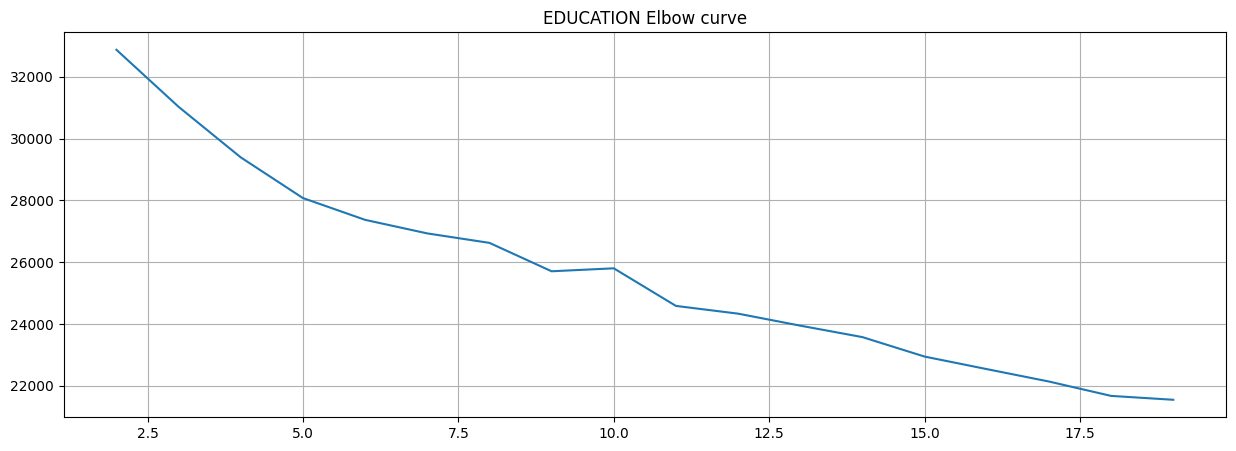

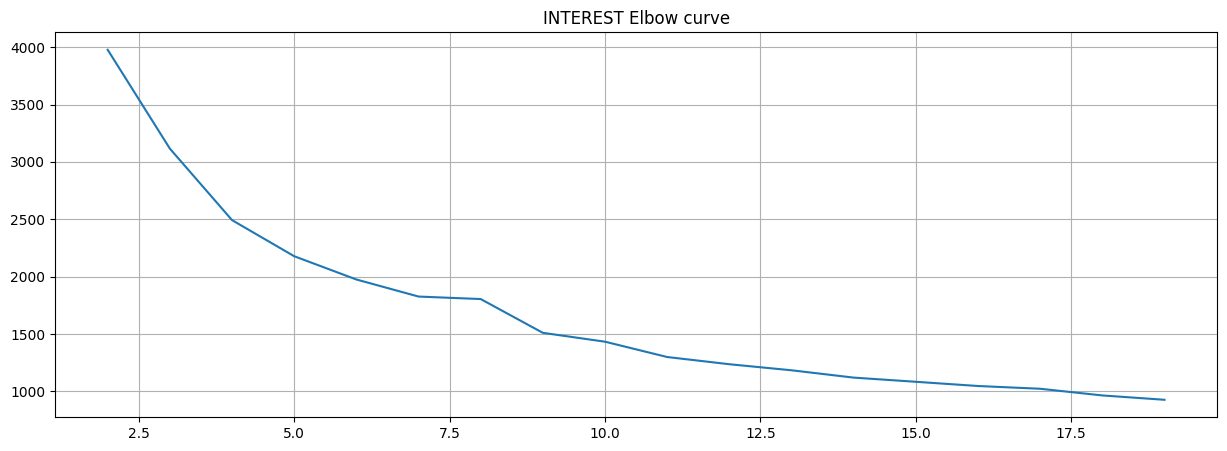

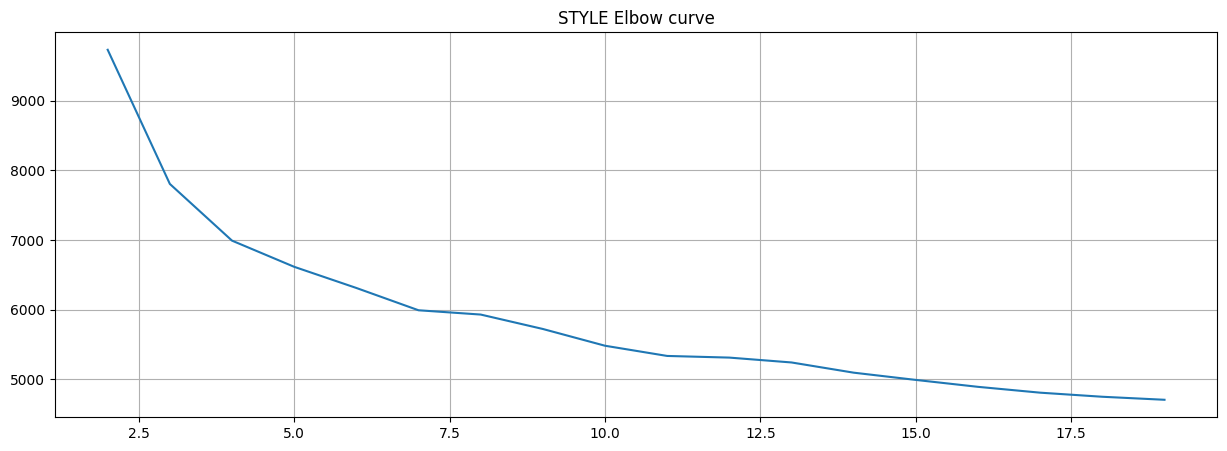

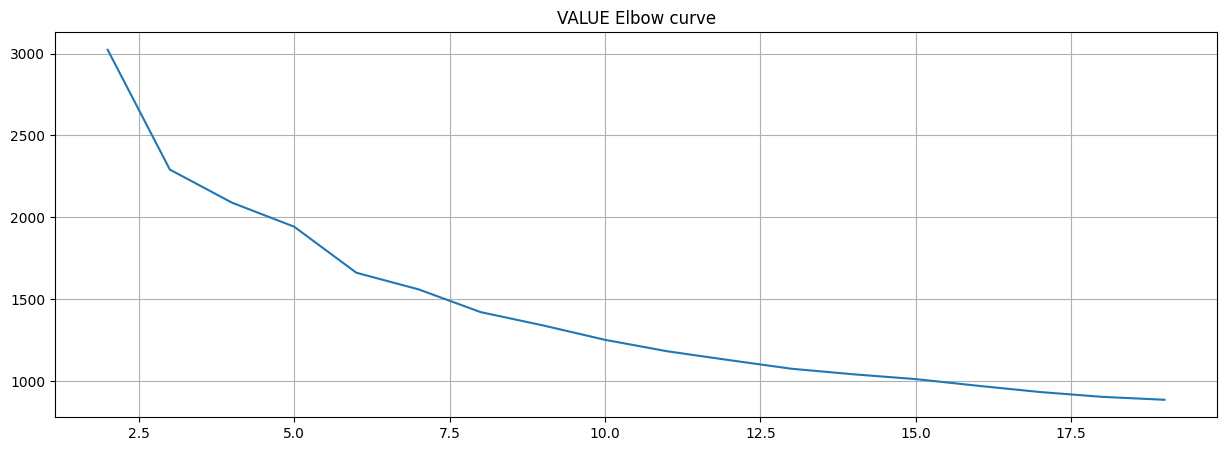

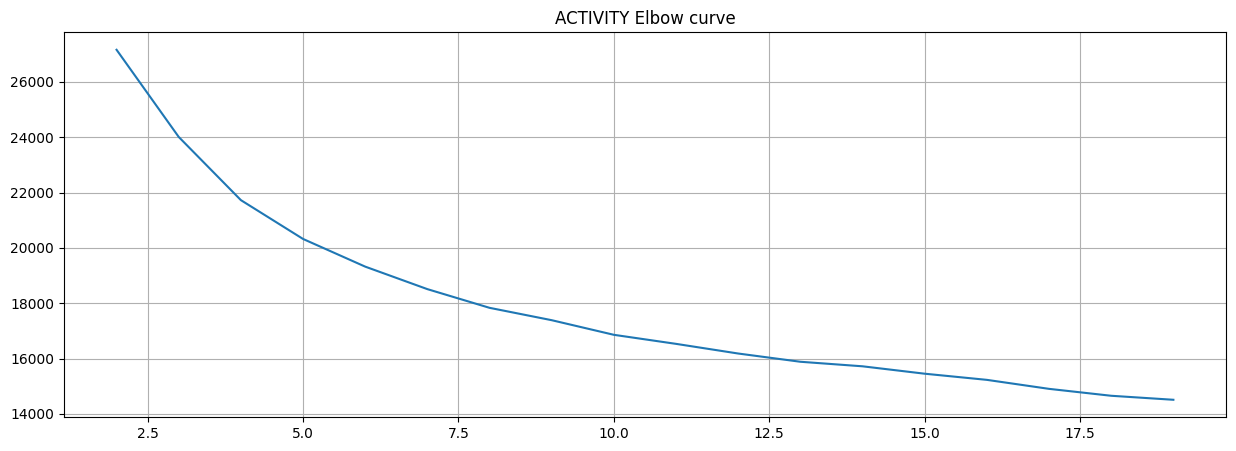

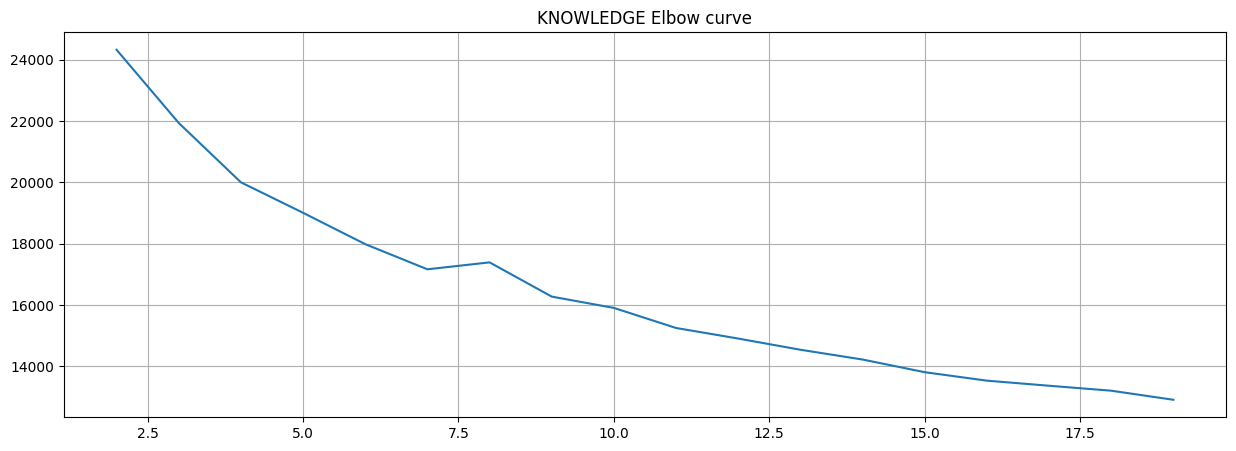

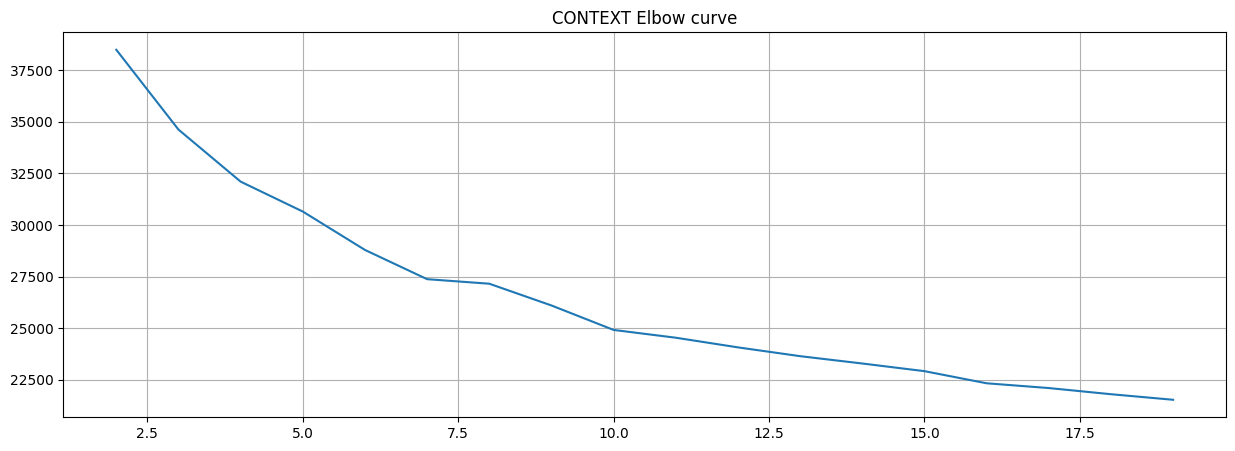

In [42]:
n_clusters = {
    "education": (2, 20),
    "interest": (2, 20),
    "style": (2, 20),
    "value": (2, 20),
    "activity": (2, 20),
    "knowledge": (2, 20),
    "context": (2, 20)
}

for key in analysis_dfs.keys():
  analysis_df = analysis_dfs[key]
  run_kmeans(analysis_df, key.upper(), n_clusters[key])
 
